In [1]:
import matplotlib.pyplot as plt
from linear_genetic_programming.lgp_classifier import LGPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

In [2]:
X, y = load_breast_cancer(return_X_y=True)
# normalize
scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [3]:
lgp = LGPClassifier(numberOfInput = X_train.shape[1], numberOfVariable = 18, populationSize = 200,
                    maxGeneration = 20, showGenerationStat = True, tournamentSize=8, isRandomSampling=True) 

In [4]:
lgp.fit(X_train, y_train)


Gen|Best Indv|  CE  |Pop Avg|Ran Sampling|AvgProgLen|AvgEffProgLen
--- --------- ------ ------- ------------ ---------- -------------
  0|     0.94|    17|   0.90|         279|     22.95|         1.57
  1|     0.95|    11|   0.92|         418|     24.03|         1.42
  2|     0.95|    11|   0.92|         314|     23.43|         1.49
  3|     0.95|    11|   0.92|         214|     23.93|         1.55
  4|     0.95|    11|   0.91|         229|     21.66|         1.53
  5|     0.95|    11|   0.92|         374|     21.34|         1.50
  6|     0.95|    11|   0.92|         267|     21.40|         1.57
  7|     0.95|    11|   0.91|         228|     20.59|         1.50
  8|     0.95|    11|   0.92|         222|     20.23|         1.53
  9|     0.95|    11|   0.92|         418|     20.29|         1.53
 10|     0.95|    11|   0.92|         341|     19.70|         1.47
 11|     0.95|    11|   0.93|         359|     19.09|         1.46
 12|     0.95|    11|   0.92|         240|     19.90|         

LGPClassifier(constInitRange=(1, 11, 1), fitnessThreshold=1.0,
              isRandomSampling=True, maxGeneration=20, maxProgLength=300,
              max_prog_ini_length=30, minProgLength=10, min_prog_ini_length=10,
              numberOfConstant=9, numberOfInput=30, numberOfOperation=5,
              numberOfVariable=18, pConst=0.5, pCrossover=0.75, pInsert=0.5,
              pMacro=0.75, pMicro=0.5, pRegmut=0.6, populationSize=200,
              showGenerationStat=True, tournamentSize=8)

In [5]:
print(lgp.bestProgStr_)

I0:  <if greater, r23, 4.0>
I1:  <if greater, r47, r37>
I2:  <-, r2, r12, r25>
I3:  <*, r0, 10.0, r6>
I4:  <if less, r25, r46>
I5:  <if less, r31, r32>
I6:  <if greater, r10, r36>
I7:  <+, r8, 5.0, r33>
I8:  <if greater, 4.0, r44>
I9:  <+, r6, 4.0, r29>
I10:  <if less, r30, r20>
I11:  <*, r0, r45, r3>
I12:  </, r4, 2.0, r4>
I13:  <if greater, r47, r31>
I14:  <if less, r44, r29>
I15:  <if less, r15, 1.0>
I16:  <-, r2, r6, r35>
I17:  <+, r12, 8.0, r47>
I18:  <if less, 5.0, r15>
I19:  <^, r8, 5.0, r32>
I20:  </, r14, r1, 6.0>
I21:  <if greater, 8.0, r11>
I22:  </, r6, r42, r7>
I23:  <^, r15, r33, r17>
I24:  <if greater, r25, r1>
I25:  </, r6, r42, r7>
I26:  <if greater, r36, r1>
I27:  <^, r15, r33, r17>
I28:  <if greater, r25, r1>
I29:  <if less, r30, r20>
I30:  <*, r0, r45, r3>
I31:  <if greater, r10, r36>
I32:  <if less, r28, 4.0>
I33:  <if greater, 1.0, r23>
I34:  <if less, r47, 8.0>
I35:  <-, r6, r25, 7.0>
I36:  <+, r14, 5.0, r8>
I37:  <if greater, r28, 4.0>
I38:  <-, r10, r15, r46>



In [6]:
print(lgp.bestEffProgStr_)

I0:  <if greater, r25, r1>
I1:  <if less, r30, r20>
I2:  <*, r0, r45, r3>



In [7]:
y_pred = lgp.predict(X_test)


In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88        53
           1       0.89      0.99      0.94        90

    accuracy                           0.92       143
   macro avg       0.93      0.89      0.91       143
weighted avg       0.92      0.92      0.91       143



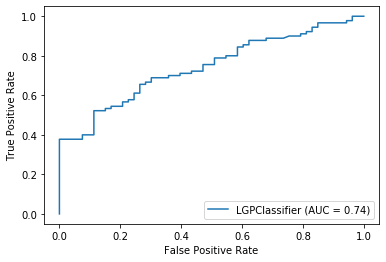

In [9]:

from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(lgp, X_test, y_test)
plt.show()

